In [84]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',False)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import recall_score, precision_score, r2_score, accuracy_score, mean_absolute_error
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
sns.set_style("darkgrid")
import xgboost as xgb

Import cleaned data

In [63]:
df_flights = pd.read_csv('cleaned_flights_sample2.csv')

In [64]:
df_flights = df_flights.drop(['fl_date','crs_dep_bin','dest','crs_arr_bin','departures_performed','payload','seats','passengers','freight','mail','ramp_to_ramp'],axis=1)

In [65]:
# label encode the carrier and origin
le = LabelEncoder()
df_flights['op_unique_carrier'] = le.fit_transform(df_flights['op_unique_carrier'])
df_flights['origin'] = le.fit_transform(df_flights['origin'])

In [66]:
X = df_flights.drop(['arr_delay'],axis=1)
y = df_flights['arr_delay']

In [67]:
# Scale the data
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns=X.columns)

Using our entire dataset to train the model to predict the first 7 days of January

In [13]:
params = {
    'n_estimators': [230,250,270],
    'max_depth': [8,9,10]
}
n=5

In [14]:
rf = RandomForestRegressor()
grid = GridSearchCV(estimator=rf,param_grid=params,cv=n,scoring='r2',verbose=1,n_jobs=-1)

In [16]:
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [17]:
#save model with pickle
# filename = 'final_gridsearch.sav'
# pickle.dump(grid,open(filename,'wb'))

Load test data

In [24]:
df_test = pd.read_csv('test_sample_cleaned.csv')

In [27]:
df_test.rename(columns={'distance_x':'distance'},inplace=True)

In [31]:
df_test = df_test.drop(['fl_date','dest','crs_dep_bin','crs_arr_bin'],axis=1)

In [35]:
# label encode the carrier and origin
le = LabelEncoder()
df_test['op_unique_carrier'] = le.fit_transform(df_test['op_unique_carrier'])
df_test['origin'] = le.fit_transform(df_test['origin'])

In [36]:
df_test

,op_unique_carrier,origin,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,weekday,totalSnow_cm,precipMM,visibility,windspeedKmph,avg_passengers,avg_percent_capacity
0,21,246,18,19,95,363,1,2,0.0,0.0,10,4,96.666077,0.755158
1,21,246,11,13,90,363,1,2,0.0,0.0,10,4,96.666077,0.755158
2,21,246,20,21,70,333,1,2,0.0,0.0,10,4,104.000000,0.720000
3,21,246,13,14,75,333,1,2,0.0,0.0,10,4,104.000000,0.720000
4,21,246,9,10,80,333,1,2,0.0,0.0,10,4,104.000000,0.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150618,0,99,17,19,117,509,1,1,0.0,0.0,10,16,57.000000,0.750000
150619,0,141,6,7,119,610,1,1,0.0,4.2,10,10,69.000000,0.910000
150620,0,20,17,18,121,589,1,1,0.0,0.8,10,18,53.000000,0.720000
150621,0,358,18,21,114,589,1,1,0.0,0.0,10,13,50.000000,0.680000


In [37]:
# Run the model to predict the test data
grid_pred = grid_results.predict(df_test)

In [53]:
submission = pd.read_csv('flights_test.csv')

In [54]:
submission['predicted_delay'] = grid_pred

In [57]:
submission = submission[['fl_date','mkt_carrier','mkt_carrier_fl_num','origin','dest','predicted_delay']]

In [59]:
submission.to_csv('final_submission.csv',index=False)

In [61]:
xg_reg = xgb.XGBRegressor(objective='reg:linear',colsample_bytree = 0.3, learning_rate = 0.1, max_depth=9,alpha=10,n_estimators=250)

In [68]:
xg_reg.fit(X_scale,y)

[21:49:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [69]:
y_pred = xg_reg.predict(df_test)

In [71]:
submission = pd.read_csv('flights_test.csv')

In [72]:
submission['predicted_delay'] = y_pred

In [73]:
submission = submission[['fl_date','mkt_carrier','mkt_carrier_fl_num','origin','dest','predicted_delay']]

In [78]:
submission.describe()

,mkt_carrier_fl_num,predicted_delay
count,150623.000000,150623.000000
mean,2825.682658,24.074169
std,1862.698573,9.484495
min,1.000000,-17.010904
25%,1196.000000,19.568090
50%,2437.000000,21.914469
75%,4491.000000,28.885012
max,6799.000000,75.744904


In [77]:
df_test.head(20)

,op_unique_carrier,origin,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,month,weekday,totalSnow_cm,precipMM,visibility,windspeedKmph,avg_passengers,avg_percent_capacity
0,21,246,18,19,95,363,1,2,0.0,0.0,10,4,96.666077,0.755158
1,21,246,11,13,90,363,1,2,0.0,0.0,10,4,96.666077,0.755158
2,21,246,20,21,70,333,1,2,0.0,0.0,10,4,104.000000,0.720000
3,21,246,13,14,75,333,1,2,0.0,0.0,10,4,104.000000,0.720000
4,21,246,9,10,80,333,1,2,0.0,0.0,10,4,104.000000,0.720000
5,21,246,6,7,75,333,1,2,0.0,0.0,10,4,104.000000,0.720000
6,21,246,16,17,80,333,1,2,0.0,0.0,10,4,104.000000,0.720000
7,21,246,15,16,85,390,1,2,0.0,0.0,10,4,108.000000,0.740000
8,21,246,12,13,85,390,1,2,0.0,0.0,10,4,108.000000,0.740000
9,21,246,7,9,80,390,1,2,0.0,0.0,10,4,108.000000,0.740000


In [85]:
submission

,fl_date,mkt_carrier,mkt_carrier_fl_num,origin,dest,predicted_delay
0,2020-01-01,WN,5888,ONT,SFO,-0.971529
1,2020-01-01,WN,6276,ONT,SFO,-3.221425
2,2020-01-01,WN,4598,ONT,SJC,-0.735366
3,2020-01-01,WN,4761,ONT,SJC,-2.263687
4,2020-01-01,WN,5162,ONT,SJC,-3.548321
...,...,...,...,...,...,...
150618,2020-01-07,DL,4813,DTW,JFK,0.621576
150619,2020-01-07,DL,4814,GSP,LGA,-7.090693
150620,2020-01-07,DL,4815,ATL,XNA,2.865193
150621,2020-01-07,DL,4815,XNA,ATL,-0.644773


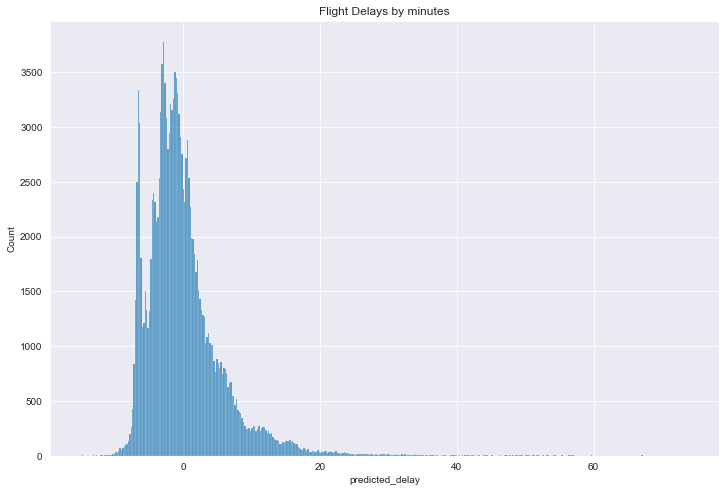

In [87]:
plt.figure(figsize=(12,8))
sns.histplot(submission['predicted_delay'])
plt.title('Flight Delays by minutes')
plt.show()